In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, time

# Load the data
data = pd.read_csv('UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.shape

(1156, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
data['PURPOSE'].isna().sum()

503

In [6]:
# Fill the missing values with 'Not Available'
data['PURPOSE'].fillna('Not Available', inplace=True)

In [7]:
# Check the purpose column again to see if the missing values are filled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
# view the row with missing values
data[data['END_DATE'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,Not Available


In [9]:
# drop all the rows with missing values
data.dropna(inplace=True)

In [10]:
data[data.isna()].count()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
# We can see one row is removed
data.shape

(1154, 7)

In [13]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [14]:
def bin_time(x):
    if x < time(4, 0, 0):
        return 'Late Night'
    elif x < time(12, 0, 0):
        return 'Morning'
    elif x < time(18, 0, 0):
        return 'Afternoon'
    elif x < time(21, 0, 0):
        return 'Evening'
    else:   
        return 'Night'

data['TIME_OF_DAY'] = data['START_DATE'].dt.time.apply(bin_time)
data.insert(1, 'TIME_OF_DAY', data.pop('TIME_OF_DAY'))
data

,START_DATE,TIME_OF_DAY,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,Night,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,Late Night,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,2016-01-02 20:25:00,Evening,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,Afternoon,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,Afternoon,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,Late Night,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,Afternoon,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,Afternoon,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,Night,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [15]:
obj_cols = data.select_dtypes(include='object').columns

# Count the number of unique values in each object column 
for idx, col in enumerate(obj_cols):
    unique_vals = data[col].unique().size
    print(f"{col}: {unique_vals}")

TIME_OF_DAY: 5
CATEGORY: 2
START: 177
STOP: 188
PURPOSE: 11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meeting'),
  Text(1, 0, 'Meal/Entertain'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Moving'),
  Text(7, 0, 'Airport/Travel'),
  Text(8, 0, 'Charity ($)'),
  Text(9, 0, 'Commute')])

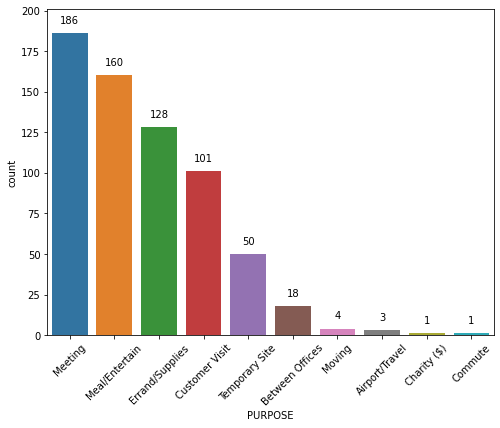

In [16]:
# get just the PURPOSE column and filter out the 'Not Available' rows
purpose = pd.DataFrame(data['PURPOSE'])
purpose = purpose[purpose['PURPOSE'] != 'Not Available'].reset_index(drop=True)

# plot the count of the purpose for each trip
plt.figure(figsize=(8, 6))
sns.countplot(x = 'PURPOSE', data = purpose, order = purpose['PURPOSE'].value_counts().index)

# reference: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot

def add_data_labels(data_col, text_buffer, y_axis_buffer):
    # get the current axis of the plot
    ax = plt.gca()

    # set the y-axis range
    ax.set_ylim([0, data_col.value_counts().max() + y_axis_buffer])

    # iterate over the bars and add the data labels
    for i, bar in enumerate(ax.patches):
        h = bar.get_height()
        ax.text(
            i, # bar index (x coordinate of text)
            h+text_buffer, # y coordinate of text
            '{}'.format(int(h)),  # y label
            ha='center', 
            va='center', 
            size=10)
        
add_data_labels(data_col=purpose['PURPOSE'], text_buffer=8, y_axis_buffer=15)

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

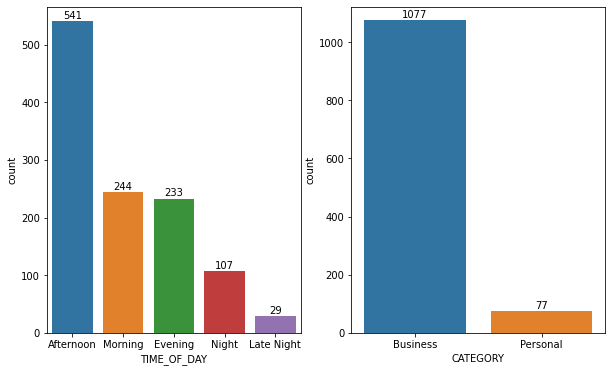

In [17]:
plt.figure(figsize=(10, 6))

# on the left plot, plot the count of trips per each time of day
plt.subplot(1, 2, 1)
sns.countplot(x = 'TIME_OF_DAY', data = data, order = data['TIME_OF_DAY'].value_counts().index)
add_data_labels(data_col=data['TIME_OF_DAY'], text_buffer=10, y_axis_buffer=25)

# on the right plot, plot the count of trips per each category
plt.subplot(1, 2, 2)
sns.countplot(x = 'CATEGORY', data = data, order = data['CATEGORY'].value_counts().index)
add_data_labels(data_col=data['CATEGORY'], text_buffer=17, y_axis_buffer=45)

plt.show()

In [18]:
# reference to Plotly documentation: https://plotly.com/python/sunburst-charts/
import plotly.express as px
fig = px.sunburst(data, path=['CATEGORY', 'PURPOSE'], title='Uber Trips by Category and Purpose')
fig.show()

In [19]:
# In the graph above, we can see that out of all business trips, 431 are not available.
# Similarly, out of all personal trips, 71 are not available.

# Let's create the graph again. This time, we will filter out the 'Not Available' rows.
category_and_purpose = pd.DataFrame(data[['CATEGORY', 'PURPOSE']])
category_and_purpose = category_and_purpose[category_and_purpose['PURPOSE'] != 'Not Available'].reset_index(drop=True)

# Check the count for each category and purpose pairs
category_and_purpose.groupby(['CATEGORY', 'PURPOSE']).size().reset_index(name='COUNT')

,CATEGORY,PURPOSE,COUNT
0,Business,Airport/Travel,3
1,Business,Between Offices,18
2,Business,Customer Visit,101
3,Business,Errand/Supplies,128
4,Business,Meal/Entertain,160
5,Business,Meeting,186
6,Business,Temporary Site,50
7,Personal,Charity ($),1
8,Personal,Commute,1
9,Personal,Moving,4


In [20]:
fig = px.sunburst(category_and_purpose, path=['CATEGORY', 'PURPOSE'], title='Uber Trips by Category and Purpose (Updated)')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='MILES'>

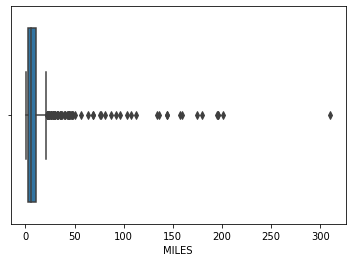

In [21]:
sns.boxplot(data['MILES'], orient='v')

In [45]:
Q1 = data['MILES'].quantile(0.25)
Q3 = data['MILES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = round(Q3 + 1.5 * IQR, 1)
median = data['MILES'].median()
mean = data['MILES'].mean()
min_miles = round(data['MILES'].min(), 1)
max_miles = round(data['MILES'].max(), 1)

print(f"""
Min: {min_miles}
Max: {max_miles}
Mean: {round(mean, 1)}
Median: {median}
Lower Bound: {lower_bound}
Q1: {Q1}
IQR: {IQR}
Q3: {Q3}
Upper Bound: {upper_bound}
""")


Min: 0.5
Max: 310.3
Mean: 10.6
Median: 6.0
Lower Bound: 0
Q1: 2.9
IQR: 7.5
Q3: 10.4
Upper Bound: 21.6



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='MILES'>

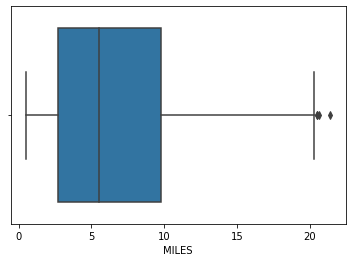

In [52]:
# Redraw the boxplot with the outliers removed
sns.boxplot(data[data['MILES'] <= upper_bound]['MILES'])

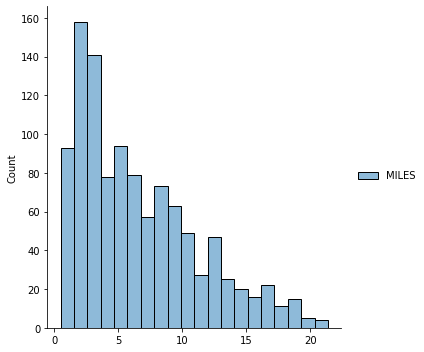

In [53]:
# Let's see this data again with a histogram, which shows the data as right-skewed.
# Here, we can see most of the trips were booked for distances within 2 to 3 miles, 
# with the number of rides tapering off after 5 miles.

sns.displot(data[data['MILES'] <= upper_bound], bins=20, kde=False)

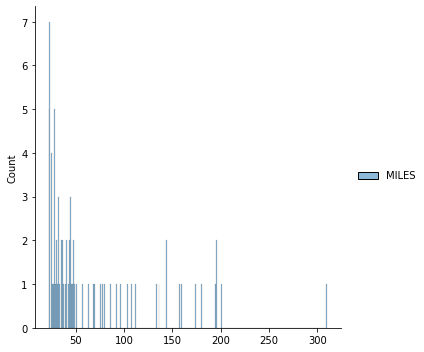

In [61]:
# Now, looking at the outliers only, we can see that the bulk of the trips were within 22 and 50 miles. 
sns.displot(data[(data['MILES'] > upper_bound)], bins=round(max_miles-upper_bound), kde=False)

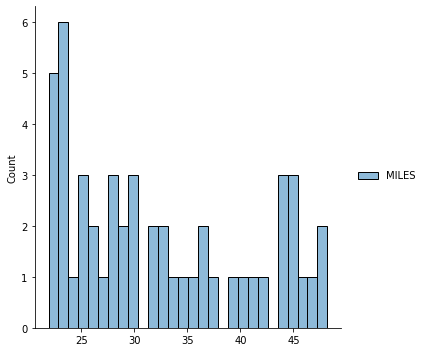

In [62]:
# ... And within the 22 and 50 miles range, only the 22 and 23 mile trips had 5 or more riders.
# In other words, we can expect 3 or fewer riders taking trips between 24 and 50 miles, and even less so beyond 50 miles.
sns.displot(data[(data['MILES'] > upper_bound) & (data['MILES'] <= 50)], bins=round(50 - upper_bound), kde=False)

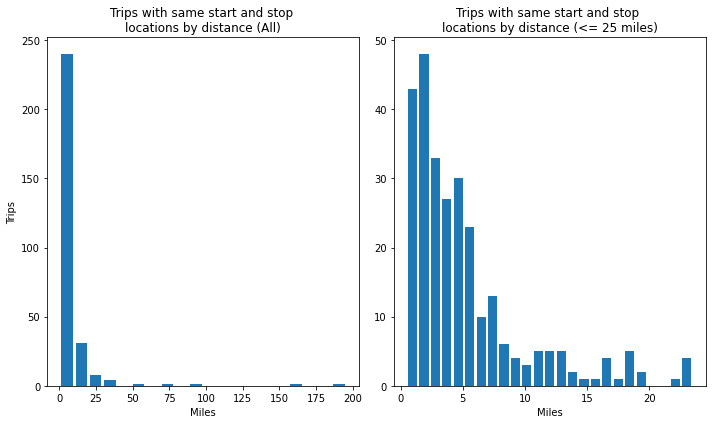

In [153]:
same_dest = pd.DataFrame(data[data['START'] == data['STOP']]).reset_index(drop=True)
# 288 trips had the same start and stop location.
len(same_dest)

df1 = pd.DataFrame(same_dest['MILES'])
df2 = df1[df1['MILES'] <= 25]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot the histogram for all the trips with the same start and stop location
axes[0].hist(df1, bins=20, histtype='barstacked', rwidth=0.8)
axes[0].set_title('Trips with same start and stop \nlocations by distance (All)')
axes[0].set_xlabel('Miles')
axes[0].set_ylabel('Trips')

# Plot the histogram for all the trips with the same start and stop location, but only for trips <= 25 miles
axes[1].hist(df2, bins=25, histtype='barstacked', rwidth=0.8)
axes[1].set_title('Trips with same start and stop \nlocations by distance (<= 25 miles)')
axes[1].set_xlabel('Miles')

fig.tight_layout()
plt.show()

In [155]:
diff_dest = pd.DataFrame(data[data['START'] != data['STOP']]).reset_index(drop=True)
fig = px.sunburst(diff_dest, path=['START', 'STOP'], title='Uber trips with different start and stop locations')
fig.show()

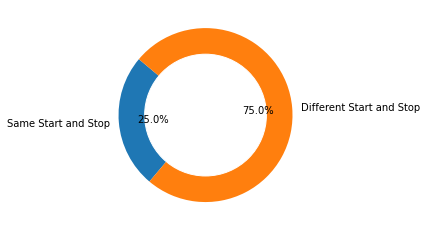

<Figure size 432x288 with 0 Axes>

In [163]:
plt.pie([same_dest.shape[0], diff_dest.shape[0]], 
        labels=['Same Start and Stop', 'Different Start and Stop'], 
        autopct='%1.1f%%', 
        startangle=140)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.figure(facecolor='white')
plt.show()